<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title : Exe25 - k-Means Exercise

#### Name: Chong Mun Chen

#### IC Number: 960327-07-5097

#### Date : 26/7/2023

#### Introduction : Practising on this exercise using k-means clustering method.



#### Conclusion : Succeeded in plotting the graph with the k-means clustering method and plotting the cluster centers in the same graph.






# Exercise 1: Build and Plot k-Means


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

import warnings

warnings.filterwarnings('ignore')

**Step 1:** create blobs with the size of 500, and center of 3

In [2]:
from sklearn.datasets import make_blobs
# X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=0)
X, y = make_blobs(n_samples=500, centers=3, random_state=0)

**Step 2:** Plot the distribution of the blobs

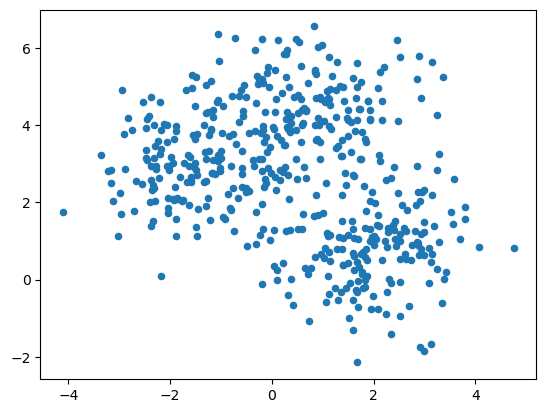

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=20)

**Step 3:** Use K-means, find the centers of these clusters

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

**Step 4:** Plot the blobs with the found centers

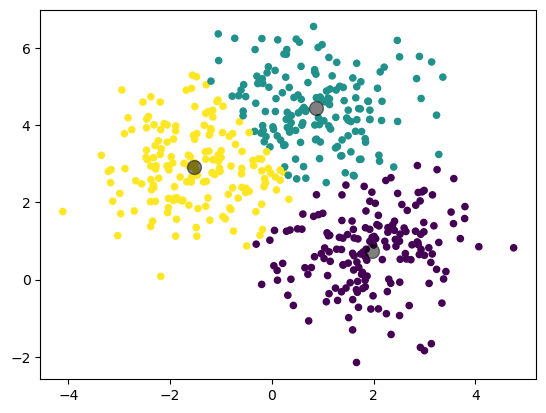

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

### Additional/Optional:

Step 5: How can you find out the automatically assigned "labels" in the produced clusters?

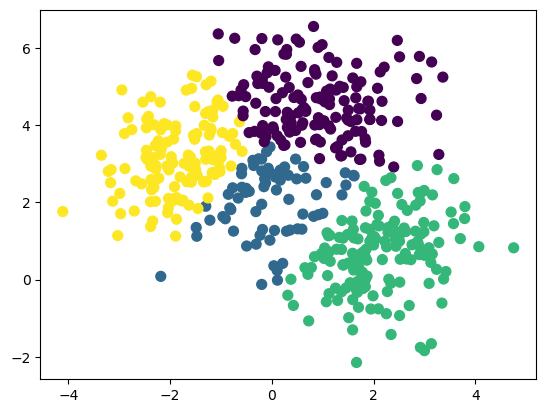

In [6]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

Step 6: How about classes? How to find out where there are classes.

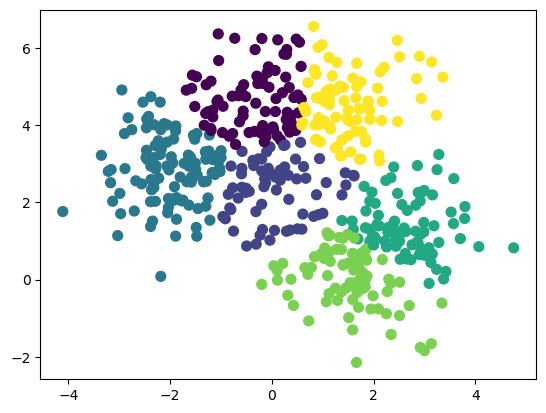

In [7]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# Exercise 2: k-Means with the Iris dataset


**Step 1:** Load the iris dataset from sklearn and other necessary libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

import warnings

warnings.filterwarnings('ignore')

iris = load_iris()

**Step 2:** Set the training and target data as X and y respectively. Display the targets.

In [9]:
X = iris.data
y = iris.target

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Introducing - *the Elbow Method:*
A technique to allow you to identify the best K

General idea: iterate the creation of k-Means clusters with increasing sizes, and record down the value of kmeans.inertia_ (inertia_: Sum of squared distances of samples to their closest cluster center.)

**Step 3:** create a list named wcss and store the inertia values for a selected range of ks.

In [10]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

**Step 4:** Plot a graph to look at 'The elbow'

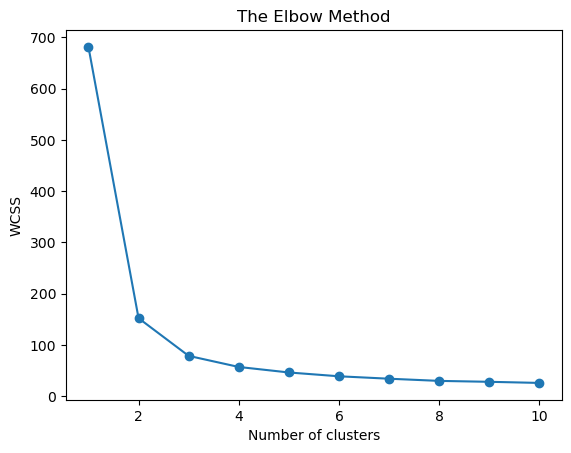

In [11]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Step 5:** Apply the best K for your k-means clustering

In [12]:
k=3

**Step 6:** Visualize the clusters. Name the clusters accordingly, and also plot the centriods.


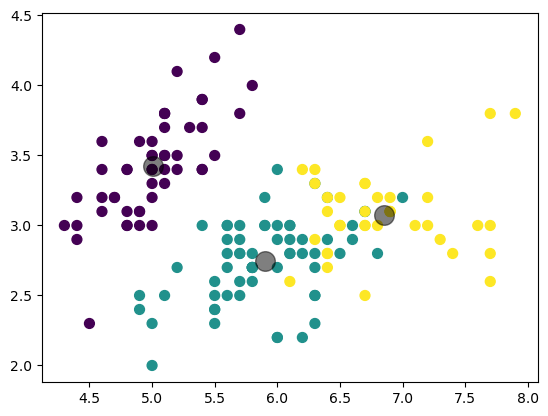

In [13]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### Additional/Optional:

**Step 7:** Plot the actual and Predicted side by side

In [14]:
comparison = pd.DataFrame({'Actual': iris.target, 'Predicted': y_kmeans})
comparison

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,1
147,2,2
148,2,2
